<a href="https://colab.research.google.com/github/keshav123333/Practicing_Different_Model/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data")

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data


100%|██████████| 41.9k/41.9k [00:00<00:00, 115MB/s]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data="/content/gold-price-data/gld_price_data.csv"
df=pd.read_csv(data)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [12]:
df["Date"]=pd.to_datetime(df["Date"])

In [13]:
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day

In [15]:
df.dropna(inplace=True)

In [17]:
df.drop(columns=["Date"],inplace=True)

In [41]:
corr=df.corr()
masked=corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
high_corr=masked.stack()[masked.stack()>0.1]
high_corr


SPX  year       0.944403
GLD  SLV        0.866632
     year       0.206654
USO  SLV        0.167547
     EUR/USD    0.829317
SLV  EUR/USD    0.321631
dtype: float64

<Axes: >

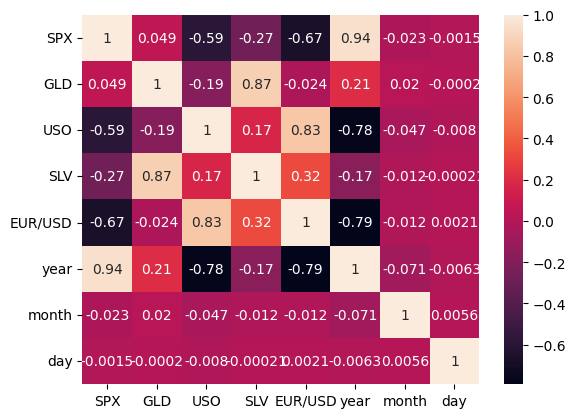

In [22]:
sns.heatmap(df.select_dtypes(include=["float","int"]).corr(),annot=True)

In [50]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD', 'year', 'month', 'day'], dtype='object')

# Linear model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model=LinearRegression()
inputs=df.drop(columns="EUR/USD")
target=df["EUR/USD"]
model.fit(inputs,target)

LinearRegression()

In [55]:
def rmse(y_true,y_pred):
  return np.sqrt(np.mean((y_true-y_pred)**2))

In [56]:
y_pred=model.predict(inputs)
rmse(target,y_pred)

np.float64(0.06079435310867328)

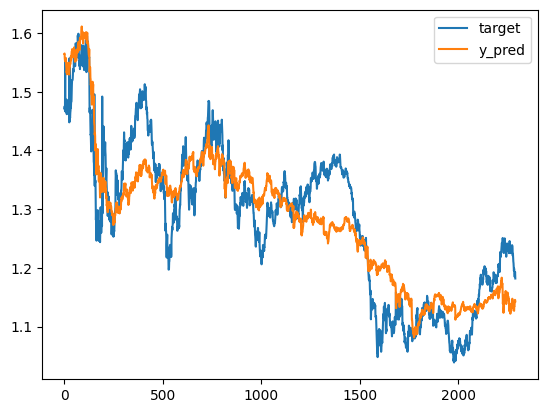

In [62]:
plt.plot(target)
plt.plot(y_pred)
plt.legend(["target","y_pred"])

In [72]:
df

,SPX,GLD,USO,SLV,EUR/USD,year,month,day
0,1447.160034,84.860001,78.470001,15.1800,1.471692,2008,1,2
1,1447.160034,85.570000,78.370003,15.2850,1.474491,2008,1,3
2,1411.630005,85.129997,77.309998,15.1670,1.475492,2008,1,4
3,1416.180054,84.769997,75.500000,15.0530,1.468299,2008,1,7
4,1390.189941,86.779999,76.059998,15.5900,1.557099,2008,1,8
...,...,...,...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789,2018,5,8
2286,2697.790039,124.330002,14.370000,15.5300,1.184722,2018,5,9
2287,2723.070068,125.180000,14.410000,15.7400,1.191753,2018,5,10
2288,2730.129883,124.489998,14.380000,15.5600,1.193118,2018,5,14
